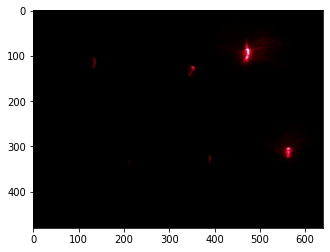

In [8]:

a =plt.imshow(img)


<IPython.core.display.Javascript object>


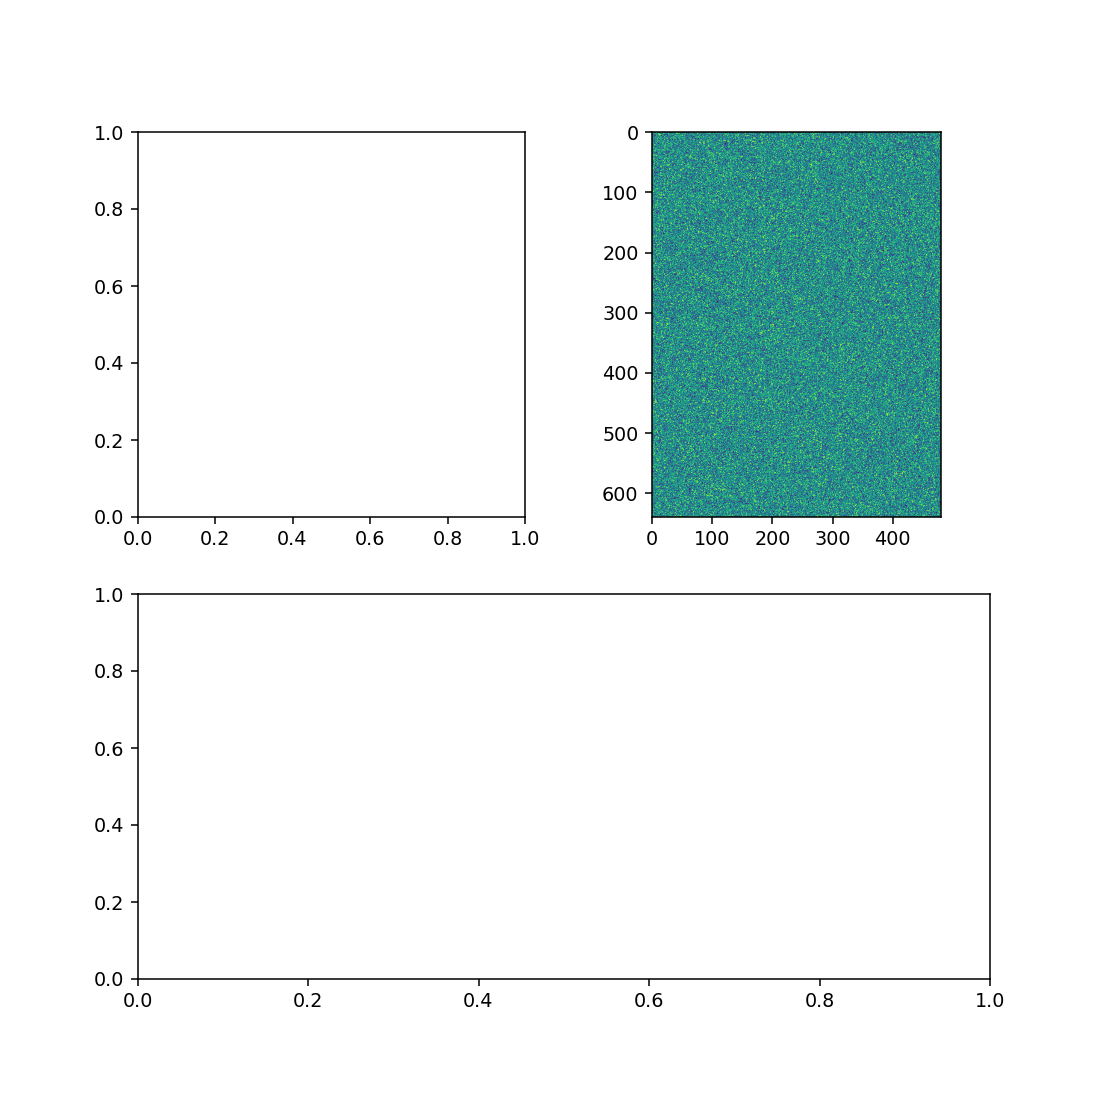

KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ori_plt = fig.add_subplot(212)
lablePlt = fig.add_subplot(221)
ax = fig.add_subplot(222)


# some X and Y data
x = [0]
y = [0]

a = np.random.rand(640,480)
li = ax.imshow(a)
# draw and show it
fig.canvas.draw()
plt.show()

# loop to update the data
for i in range(100):
    #sig += [np.random.rand()] 
  
    li.set_data(np.random.rand(640,480)**i)
    
    
    #ax.relim() 
    #ax.autoscale_view(True,True,True) 

    fig.canvas.draw()
    #time.sleep(0.01)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive #, fixed, interact_manual, Button, Layout, fixed, widgets
import time 
%matplotlib notebook

In [5]:
from jupyterplot import ProgressPlot
import numpy as np


In [7]:
from jupyterplot import ProgressPlot
import numpy as np

pp = ProgressPlot()
for i in range(1000):
    pp.update(np.sin(i / 100))
pp.finalize()

In [ ]:
dir(li)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib notebook
fig,ax = plt.subplots(1)
#ax = fig.add_subplot(111)

# some X and Y data
x = [0]
y = [0]

a = np.random.rand(50,50)
li = ax.imshow(a)

# draw and show it
fig.canvas.draw()
plt.show()

# loop to update the data
for i in range(100):
    #sig += [np.random.rand()] 
  
    li.set_data(np.random.rand(50,50))
    
    
    #ax.relim() 
    #ax.autoscale_view(True,True,True) 

    fig.canvas.draw()
    #time.sleep(0.01)


KeyboardInterrupt: 

In [2]:
import time
import picamera
#from IPython.display import display, update_display, display_jpeg, clear_output
#from IPython.display import Image as showimg
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
import SHSlib  as sh
import io

%load_ext autoreload
%autoreload 2

In [2]:
disp = sh.utils.LCD()
disp.Init()


In [ ]:
a =  picamera.PiCamera(
        sensor_mode= 4,  # 1640x1232, full FoV, binning 2x2
        resolution= (640,480))

In [ ]:
eval("a.MAX_FRAMERATE")

In [ ]:
a.MAX_FRAMERATE

In [ ]:
a

In [ ]:
print(eval("a." + dir(a)[5]))
print(eval("a." + dir(a)[6]))

In [ ]:
dir(a._camera_config)

In [3]:
with picamera.PiCamera(
        sensor_mode= 4,  # 1640x1232, full FoV, binning 2x2
        resolution= (640,480),
        framerate= 10
) as camera:
    time.sleep(1)  # let the camera warm up and set gain/white balance
    camera.exposure_mode = 'off'
    camera.awb_mode = 'off'
    #camera.awb_gains = 2.5
    camera.awb_gains = 2
    
    camera.shutter_speed = int(6e6)
    camera.iso = 1
    output = np.zeros((480,640,3), dtype=np.uint8)
    while True:
        t1 = time.time_ns() 
        camera.capture(output,'rgb',use_video_port=True)
        t2 = time.time_ns()
        img = Image.fromarray(output,'RGB')
        img2 = np.copy(img)
        
        display(img,clear=True)    
        
        #clear_output(wait=True)
        #img.thumbnail((240,320))
        
        #disp.ShowImage(img)
        t3 = time.time_ns() - t2 
        print( "time frame ", np.round((t2-t1)/1e6) ,"ms time draw ", np.round(t3/1e6), "ms")

KeyboardInterrupt: 

In [ ]:
%time a = cv.GaussianBlur(img_uint,(11,11),cv.BORDER_DEFAULT)
plt.imshow(a)


In [13]:
r = (1,2)


In [24]:
(*reversed(r),3)


(2, 1, 3)

In [43]:
%time partners = sh.analyse.getPartner(center, ref_center)

CPU times: user 4.62 ms, sys: 262 µs, total: 4.88 ms
Wall time: 4.05 ms


In [11]:
len(ref_center[1])

6

In [1]:

indx = 0 

#resolution = (640,480)
resolution = (1280,720)

#resolution = (1640,1232)
#resolution =(4032//2, 3040//2)
with picamera.PiCamera(
        sensor_mode= 4,  # 1640x1232, full FoV, binning 2x2
        resolution= resolution,
        #resolution= (320,240),        
        framerate= 1
) as camera:
    time.sleep(1)  # let the camera warm up and set gain/white balance
    camera.exposure_mode = 'off'
    camera.awb_mode = 'off'
    camera.awb_gains = 2.5

    camera.shutter_speed = int(6e6)
    camera.iso = 50
    output = np.zeros((*reversed(resolution),3), dtype=np.uint8)
    
    
    # Get Ref Image
    for i in range(5):
        camera.capture(output,'rgb',use_video_port=True)
        
    ref_img = Image.fromarray(output,'RGB')
    ref_img = np.mean(ref_img,2) 
    
    # Precess Ref Image
    ref_lables = sh.analyse.getSeperation(ref_img,min_distance=300)
    ref_center = sh.analyse.getMomentum(ref_lables,ref_img, algorythm="C") 
    
    while True:
        t1 = time.time_ns()
        camera.capture(output,'rgb',use_video_port=True)
        p_img = Image.fromarray(output,'RGB')
        img = np.mean(p_img,2)
        
        #lables = sh.analyse.getSeperation(img)
        #center = sh.analyse.getMomentum(lables, img) 
        
        for i in range(10):
            center = sh.analyse.getMomentum(ref_lables, img, algorythm="C") 
            partners = sh.analyse.getPartner(center, ref_center)
        print((time.time_ns() - t1) /1e7  )

        if not isinstance(ref_lables, float):
            plt.imshow(ref_lables)
            plt.plot(center[0],center[1],"r.")
            plt.plot(ref_center[0],ref_center[1],"b.")
            #plt.figure()
            #plt.plot(a)
            
            
            plt.figure()
            for x,y in zip(partners[0],partners[1]):
                plt.plot([0,x],[0,y],"")
 
            display(clear=True)
            plt.show()
            indx += 1
            print(indx)

NameError: name 'picamera' is not defined

In [3]:
from jupyterplot import ProgressPlot
import numpy as np

pp = ProgressPlot()
#pp.update(np.sin(i / 100))
pp.finalize()


with picamera.PiCamera(
        sensor_mode= 4,  # 1640x1232, full FoV, binning 2x2
        resolution= (640,480),
        #resolution= (320,240),        
        framerate= 10
) as camera:
    time.sleep(1)  # let the camera warm up and set gain/white balance
    camera.exposure_mode = 'off'
    camera.awb_mode = 'off'
    camera.awb_gains = 2.5

    camera.shutter_speed = int(6e6)
    camera.iso = 50
    output = np.zeros((480,640,3), dtype=np.uint8)
    
    
    # Get Ref Image
    camera.capture(output,'rgb',use_video_port=True)
    ref_img = Image.fromarray(output,'RGB')
    ref_img = np.mean(ref_img,2) 
    
    # Precess Ref Image
    ref_lables = sh.analyse.getSeperation(ref_img)
    ref_center = sh.analyse.getMomentum(ref_lables,ref_img) 
    
    while True:
        #t1 = time.time_ns() 
        camera.capture(output,'rgb',use_video_port=True)
        #t2 = time.time_ns()
        p_img = Image.fromarray(output,'RGB')
        img = np.mean(p_img,2)
        
        #lables = sh.analyse.getSeperation(img)
        #center = sh.analyse.getMomentum(lables, img) 
        center = sh.analyse.getMomentum(ref_lables, img) 

        partners = sh.analyse.getPartner(center, ref_center)
        a += [partners[0][0]]
        pp.update(partners[0][1])
#        display(p_img)
        #display(p_img,clear=True)    
#         if not isinstance(ref_lables, float):
#             plt.imshow(ref_lables)
#             plt.plot(center[0],center[1],"r.")
#             plt.plot(ref_center[0],ref_center[1],"g.")
            
            
#             plt.figure()
#             plt.plot(a)
            
            
#             display(clear=True)
#             plt.show()
                   
        
        #time.sleep(1)
        #img2 = np.copy(img)
        #clear_output(wait=True)
        #img.thumbnail((240,320))
        #disp.ShowImage(img)
        #t3 = time.time_ns() - t2 
        #print( "time frame ", np.round((t2-t1)/1e6) ,"ms time draw ", np.round(t3/1e6), "ms")

mmal: mmal_vc_port_enable: failed to enable port vc.null_sink:in:0(OPQV): ENOSPC
mmal: mmal_port_enable: failed to enable connected port (vc.null_sink:in:0(OPQV))0x1e90a70 (ENOSPC)
mmal: mmal_connection_enable: output port couldn't be enabled


PiCameraMMALError: Failed to enable connection: Out of resources

In [ ]:
i = np.mean(img2,2)
c = plt.imshow(i); plt.colorbar(c)

In [ ]:
%time a = sh.analyse.getSeperation(i)
plt.imshow(a)

In [ ]:
b[1]

In [ ]:
#b = sh.analyse.getMomentum(a, i,algorythm = "CV") 
%time b = sh.analyse.getMomentum(a, i) 

c = plt.imshow(i); plt.colorbar(c)
plt.plot(b[0],b[1],"r.")

img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
plt.close()
im = Image.open(img_buf)
im.show()


In [ ]:
sh.analyse.getPartner(ref_b)

In [ ]:
plt.imshow(sns)
plt.show()
plt.imshow(lab)
plt.show()

In [ ]:
k = le.load()

In [ ]:
k[1,1] = int(255)
k

In [ ]:
n = 100
sns = lab = 255*(i/np.max(i)) 
sns = np.uint8(i) # Sensor image

lab = 255*(a/np.max(a))
lab = np.uint8(lab) # Lables

le = Image.fromarray(np.dstack((lab,sns,sns)),'HSV')
le.convert(mode="RGB")